<a href="https://colab.research.google.com/github/Yogs05/Task/blob/main/Proyek_ANN_vs_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Artificial Neural Networks (ANN) Model for Prediction of Death in Heart Failure Patients


# I. Pre-Processing

In [ ]:
#Import Modul dan Package yang diperlukan
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import seaborn as sns
from keras.layers import Dense, BatchNormalization, Dropout, LSTM
from keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from keras import callbacks
from keras.callbacks import EarlyStopping
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("andrewmvd/heart-failure-clinical-data")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/heart-failure-clinical-data


In [ ]:
#Import Data
data = pd.read_csv("/kaggle/input/heart-failure-clinical-data/heart_failure_clinical_records_dataset.csv")

data.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [ ]:
#Menampilkan Informasi Ringkas terkait dataframe
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [ ]:
print(data.isnull().sum())  # Cek missing values
data = data.dropna()  # Menghapus baris dengan missing values


age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64


<ipython-input-6-c57474e8ca31>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x= data["DEATH_EVENT"], palette= cols)


<Axes: xlabel='DEATH_EVENT', ylabel='count'>

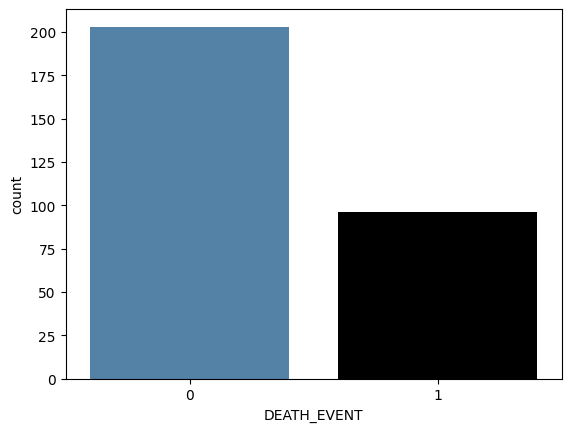

In [ ]:
#Melihat Angka Kematian dari Fitur Death Event
cols = ["#4682B4", "#000000"]
sns.countplot(x= data["DEATH_EVENT"], palette= cols)

In [ ]:
#Menetapkan Nilai-Nilai pada Fitur sebagai X dan Target sebagai Y
X=data.drop(["DEATH_EVENT"],axis=1)
y=data["DEATH_EVENT"]

In [ ]:
# Terapkan SMOTE untuk menangani imbalanced data
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_smote, y_smote = smote.fit_resample(X, y)

# Cek distribusi kelas setelah SMOTE
print("Distribusi kelas setelah SMOTE:", np.bincount(y_smote))

Distribusi kelas setelah SMOTE: [203 203]


In [ ]:
# Normalisasi fitur menggunakan StandardScaler
from sklearn.preprocessing import StandardScaler

# Dapatkan nama kolom asli
col_names = list(X.columns)

# Terapkan normalisasi menggunakan StandardScaler
s_scaler = StandardScaler()
X_smote_scaled = s_scaler.fit_transform(X_smote)

# Ubah hasil normalisasi kembali ke dataframe dengan kolom asli
X_smote_scaled = pd.DataFrame(X_smote_scaled, columns=col_names)

# Lihat deskripsi statistik untuk memastikan normalisasi
X_smote_scaled.describe().T


,count,mean,std,min,25%,50%,75%,max
age,406.0,3.937737e-16,1.001234,-1.902544,-0.761124,-0.118886,0.645539,2.768942
anaemia,406.0,3.500211e-17,1.001234,-0.773579,-0.773579,-0.773579,1.292692,1.292692
creatinine_phosphokinase,406.0,-1.640724e-17,1.001234,-0.607804,-0.495260,-0.322728,-0.014294,7.714076
diabetes,406.0,-8.750526e-18,1.001234,-0.753371,-0.753371,-0.753371,1.327368,1.327368
ejection_fraction,406.0,-2.537653e-16,1.001234,-1.942589,-0.719513,-0.140161,0.288989,3.722185
high_blood_pressure,406.0,-5.250316e-17,1.001234,-0.651584,-0.651584,-0.651584,1.534722,1.534722
platelets,406.0,-4.659655e-16,1.001234,-2.530078,-0.552262,-0.003003,0.478446,6.219195
serum_creatinine,406.0,1.356332e-16,1.001234,-0.955894,-0.482776,-0.295674,0.179589,7.465604
serum_sodium,406.0,1.163820e-15,1.001234,-5.415229,-0.526903,-0.061348,0.636985,2.731982
sex,406.0,5.250316e-17,1.001234,-1.208555,-1.208555,0.827434,0.827434,0.827434


# **II. Artificial Neural network (ANN)**

In [ ]:
#Membagi dataset menjadi Training and Testing
X_train, X_test, y_train, y_test = train_test_split(X_smote_scaled, y_smote, test_size=0.25, random_state=7)

In [ ]:
#Arsitektur ANN
model = Sequential()
model.add(Dense(units = 16, kernel_initializer = 'uniform', activation = 'relu', input_dim = 12))
model.add(Dense(units = 8, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dropout(0.25))
model.add(Dense(units = 4, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))
from tensorflow.keras.optimizers import SGD

#Compiling Model ANN
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Early stopping untuk mencegah overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)



/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# Train the ANN
history = model.fit(X_train, y_train, batch_size = 32, epochs = 500,callbacks=[early_stopping], validation_split=0.2)

Epoch 1/500
8/8 ━━━━━━━━━━━━━━━━━━━━ 6s 327ms/step - accuracy: 0.5416 - loss: 0.6932 - val_accuracy: 0.4918 - val_loss: 0.6932
Epoch 2/500
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5044 - loss: 0.6931 - val_accuracy: 0.4918 - val_loss: 0.6932
Epoch 3/500
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5026 - loss: 0.6931 - val_accuracy: 0.4918 - val_loss: 0.6932
Epoch 4/500
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.4828 - loss: 0.6932 - val_accuracy: 0.4918 - val_loss: 0.6932
Epoch 5/500
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5129 - loss: 0.6930 - val_accuracy: 0.4918 - val_loss: 0.6931
Epoch 6/500
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.5206 - loss: 0.6929 - val_accuracy: 0.4918 - val_loss: 0.6931
Epoch 7/500
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.4755 - loss: 0.6931 - val_accuracy: 0.4918 - val_loss: 0.6928
Epoch 8/500
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5563 - loss: 0.6922 - val_accuracy: 0.4918 - val_loss

Epoch 1/500
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.7913 - loss: 0.4131 - val_accuracy: 0.8197 - val_loss: 0.3341
Epoch 2/500
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.7520 - loss: 0.4779 - val_accuracy: 0.8197 - val_loss: 0.3366
Epoch 3/500
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.7911 - loss: 0.4366 - val_accuracy: 0.8197 - val_loss: 0.3389
Epoch 4/500
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.7642 - loss: 0.4092 - val_accuracy: 0.8197 - val_loss: 0.3375
Epoch 5/500
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7874 - loss: 0.4477 - val_accuracy: 0.8361 - val_loss: 0.3347
Epoch 6/500
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8172 - loss: 0.3291 - val_accuracy: 0.8525 - val_loss: 0.3327
Epoch 7/500
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7874 - loss: 0.3958 - val_accuracy: 0.8361 - val_loss: 0.3330
Epoch 8/500
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8153 - loss: 0.3649 - val_accuracy: 0.8361 - val_loss:

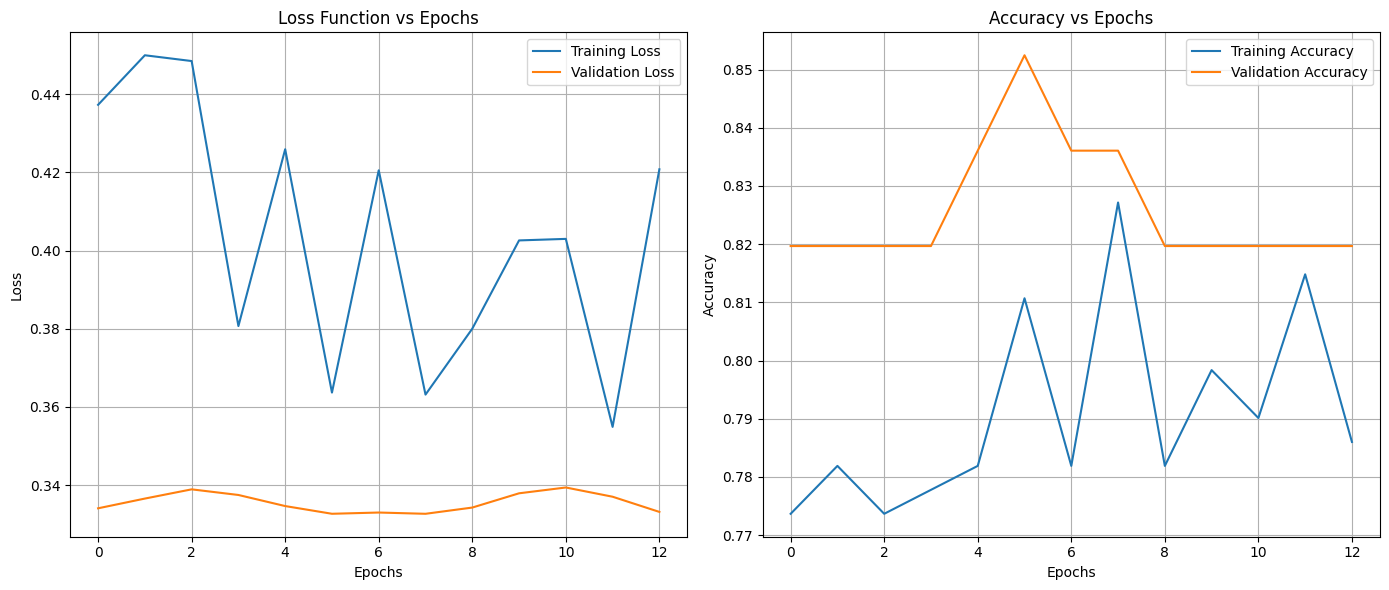

In [ ]:
import matplotlib.pyplot as plt

# Train the ANN
history = model.fit(X_train, y_train, batch_size=32, epochs=500,
                    callbacks=[early_stopping], validation_split=0.2)

# Create a figure with subplots
plt.figure(figsize=(14, 6))

# 1. Plot the Loss Function
plt.subplot(1, 2, 1)  # First plot (for Loss)
plt.plot(history.history['loss'], label='Training Loss')

# Plot validation loss if available
if 'val_loss' in history.history:
    plt.plot(history.history['val_loss'], label='Validation Loss')

# Add title, labels, and grid
plt.title('Loss Function vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

# 2. Plot the Accuracy
plt.subplot(1, 2, 2)  # Second plot (for Accuracy)
plt.plot(history.history['accuracy'], label='Training Accuracy')

# Plot validation accuracy if available
if 'val_accuracy' in history.history:
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')

# Add title, labels, and grid
plt.title('Accuracy vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# Show both plots
plt.tight_layout()
plt.show()

# **III. Evaluasi Model**

In [ ]:
#Evaluasi Model
def evaluation_parametrics(y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)

    return {
        'accuracy': accuracy,
        'f1_score': f1,
        'recall': recall,
        'precision': precision
    }

# Menggunakan fungsi
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5)
metrics = evaluation_parametrics(y_test, y_pred)
print("Akurasi: %.2f%%" % (metrics['accuracy'] * 100))
print("F1 Score: %.2f%%" % (metrics['f1_score']* 100))
print("Recall: %.2f%%" % (metrics['recall']* 100))
print("Precision: %.2f%%" % (metrics['precision']* 100))

4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 195ms/step
Akurasi: 81.37%
F1 Score: 81.19%
Recall: 83.67%
Precision: 78.85%


In [ ]:
def evaluation_parametrics(y_true, y_pred):
    # Menghitung confusion mstrix
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()

    # Menghitung spesifisitas
    specificity = tn / (tn + fp)

    # Menghitung evaluasi lainnya
    accuracy = accuracy_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)  # Sensitivity
    precision = precision_score(y_true, y_pred)

    return {
        'accuracy': accuracy,
        'f1_score': f1,
        'recall': recall,  # Sensitivity
        'precision': precision,
        'specificity': specificity  # Spesifisitas
    }

# Menggunakan fungsi
metrics = evaluation_parametrics(y_test, y_pred)
print("Akurasi: %.2f%%" % (metrics['accuracy'] * 100))
print("F1 Score: %.2f%%" % (metrics['f1_score']* 100))
print("Recall (Sensitivity): %.2f%%" % (metrics['recall']* 100))
print("Precision: %.2f%%" % (metrics['precision']* 100))
print("Spesificity: %.2f%%" % (metrics['specificity']* 100))


Akurasi: 81.37%
F1 Score: 81.19%
Recall (Sensitivity): 83.67%
Precision: 78.85%
Spesificity: 79.25%


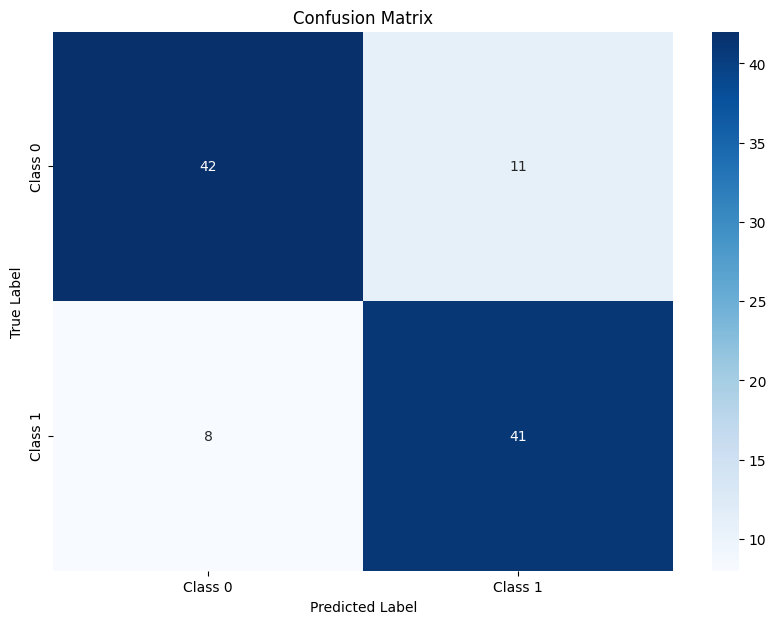

In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Class 0', 'Class 1'],  # Adjust labels as needed
            yticklabels=['Class 0', 'Class 1'])  # Adjust labels as needed
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

#### IV. Convolutional Neural Network

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.utils import to_categorical

# Load the dataset#Import Data
data = pd.read_csv("/kaggle/input/heart-failure-clinical-data/heart_failure_clinical_records_dataset.csv")

# Separate features (X) and target (y)
X = data.drop('DEATH_EVENT', axis=1).values  # Assuming 'DEATH_EVENT' is the target column
y = data['DEATH_EVENT'].values  # Binary target variable (death event)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data (normalize the features)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Convert the target (y) to categorical (for binary classification)
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)


In [ ]:
import numpy as np

# Reshape the data to 3D (num_samples, num_features, 1) for Conv1D
X_train_reshaped = np.expand_dims(X_train, axis=-1)  # Adding a channel dimension
X_test_reshaped = np.expand_dims(X_test, axis=-1)


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers

# Build the 1D CNN model
model = Sequential()

# 1D convolutional layers
model.add(layers.Conv1D(32, 3, activation='relu', input_shape=(X_train_reshaped.shape[1], 1)))
model.add(layers.MaxPooling1D(pool_size=2))

model.add(layers.Conv1D(64, 3, activation='relu'))
model.add(layers.MaxPooling1D(pool_size=2))

# Flatten the output before passing to Dense layers
model.add(layers.Flatten())

# Dense (fully connected) layers
model.add(layers.Dense(64, activation='relu'))

# Output layer for binary classification (2 classes)
model.add(layers.Dense(2, activation='softmax'))  # 2 units, softmax activation for classification

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Print the model summary to check the architecture
model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                 │ (None, 10, 32)         │           128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d (MaxPooling1D)    │ (None, 5, 32)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_1 (Conv1D)               │ (None, 3, 64)          │         6,208 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_1 (MaxPooling1D)  │ (None, 1, 64)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 2)              │           130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,626 (41.51 KB)

 Trainable params: 10,626 (41.51 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Train the model
history = model.fit(X_train_reshaped, y_train,
                    batch_size=32, epochs=50,
                    validation_data=(X_test_reshaped, y_test))


Epoch 1/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 5s 293ms/step - accuracy: 0.6178 - loss: 0.6706 - val_accuracy: 0.5833 - val_loss: 0.7093
Epoch 2/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6526 - loss: 0.6655 - val_accuracy: 0.5833 - val_loss: 0.7130
Epoch 3/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6712 - loss: 0.6349 - val_accuracy: 0.5833 - val_loss: 0.7056
Epoch 4/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7067 - loss: 0.5896 - val_accuracy: 0.5833 - val_loss: 0.6867
Epoch 5/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6844 - loss: 0.5940 - val_accuracy: 0.6000 - val_loss: 0.6615
Epoch 6/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7174 - loss: 0.5605 - val_accuracy: 0.6000 - val_loss: 0.6873
Epoch 7/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7491 - loss: 0.5171 - val_accuracy: 0.6000 - val_loss: 0.6460
Epoch 8/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7849 - loss: 0.5135 - val_accuracy: 0.6167 - val_loss: 0.6216


In [ ]:
# Evaluate the model on test data
test_loss, test_accuracy = model.evaluate(X_test_reshaped, y_test)
print(f"Test accuracy: {test_accuracy * 100:.2f}%")


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.6743 - loss: 1.0231
Test accuracy: 68.33%


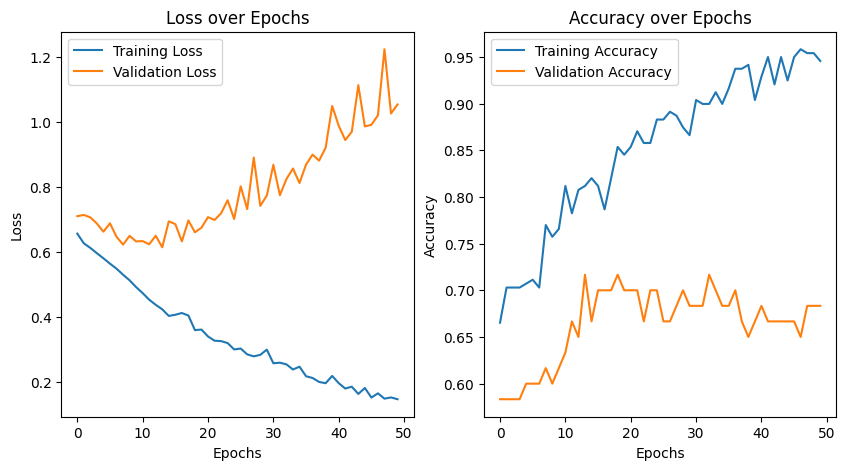

In [ ]:
import matplotlib.pyplot as plt

# Plot the training and validation loss over epochs
plt.figure(figsize=(10, 5))

# Plot loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()
